## New way of visualizing D

Still something odd with se--it only takes into account one D-stat, which doesn't incorporate relationships shown in other D-stat...

[['Bbdong', 'Han_HGDP', 'Zongri', 0.000534, 1.501], ['Bbdong', 'Zongri', 'Han_HGDP', 0.00114, 3.448], ['Zongri', 'Han_HGDP', 'Bbdong', -0.000606, -2.147]]
[['Bbdong', 'Dai', 'Zongri', 0.00169, 4.568], ['Bbdong', 'Zongri', 'Dai', 0.001161, 3.331], ['Zongri', 'Dai', 'Bbdong', 0.000529, 1.658]]
[['Bbdong', 'Maonan', 'Zongri', 0.001376, 3.789], ['Bbdong', 'Zongri', 'Maonan', 0.001156, 3.396], ['Zongri', 'Maonan', 'Bbdong', 0.00022, 0.728]]
[['Bbdong', 'Ami_Stoneking', 'Zongri', 0.001813, 4.905], ['Bbdong', 'Zongri', 'Ami_Stoneking', 0.001705, 4.712], ['Zongri', 'Ami_Stoneking', 'Bbdong', 0.000108, 0.32]]
[['Bbdong', 'Ulchi', 'Zongri', 0.000895, 2.513], ['Bbdong', 'Zongri', 'Ulchi', 0.00105, 3.056], ['Zongri', 'Ulchi', 'Bbdong', -0.000155, -0.517]]
[['Bbdong', 'Han_HGDP', 'HDYM1', 0.000955, 1.853], ['Bbdong', 'HDYM1', 'Han_HGDP', 0.001312, 3.014], ['HDYM1', 'Han_HGDP', 'Bbdong', -0.000356, -0.686]]
[['Bbdong', 'Dai', 'HDYM1', 0.002202, 4.064], ['Bbdong', 'HDYM1', 'Dai', 0.001423, 3.085], ['

(0, 0.004337000000000001)

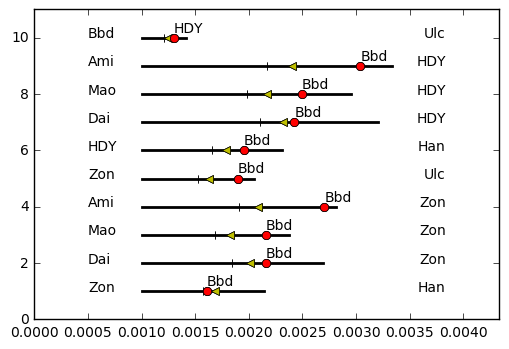

In [137]:
%matplotlib inline

import matplotlib.pyplot as plt

#pd="/home/mel_yang/projects/bronzeage/Dstats/"
#fh="ind_A_v13_TBH"
#mytype="D"
#title="EAS_Tianyuan_Mbuti"
#myfilename="%s%s.%s.%s.log" % (pd,fh,mytype,title)

mainind="Bbdong"
pd="/mnt/solexa/mel_yang/neolithic/qmf/f4stats/"
myfilename="%sF4.list.%s" % (pd,mainind)

myfile=open(myfilename,'r')
#eas=['Daur', 'Hezhen', 'Mongola', 'Naxi', 'Oroqen', 
    # 'Xibo', 'Dai', 'Han', 'Japanese']
    #'Maonan', 'Miao', 'Mulam', 'She', 'Tujia', 'Yi', 'Cambodian']
#popslist=[("Tianyuan",i+".DG","Balikun") for i in eas]

eas=["Han_HGDP","Dai","Maonan","Ami_Stoneking","Ulchi"]
popslist=[("Zongri",i,mainind) for i in eas]
popslist+=[("HDYM1",i,mainind) for i in eas]
myp4="Mbuti"
offset,offset2=(0.05,0.008) ##first one dictates line boundaries; second dictates text bound.
offset,offset2=(0.01,0.004)
offset,offset2=(0.001,0.0005)

reldat=[[0,0,0] for i in popslist]
for line in myfile:
    if "result:" not in line: continue
    if myp4 not in line: continue
    x=line.split()
    for popind,pops in enumerate(popslist):
        if x[1] in pops and x[2] in pops and x[3] in pops: 
            if pops[0] == x[3]: reldat[popind][0]=x[1:4]+[float(x[5]),float(x[6])]
            elif pops[1] == x[3]: reldat[popind][1]=x[1:4]+[float(x[5]),float(x[6])]
            elif pops[2] == x[3]: reldat[popind][2]=x[1:4]+[float(x[5]),float(x[6])]
            else: continue

Zcutoff=2.5

retrieve=[]
for indset,myset in enumerate(reldat):
    print myset
    Dval=[abs(i[3]) for i in myset]
    #Zval=[abs(i[4]) for i in myset]
    #seval=[Dval[i]/Zcutoff for i in range(len(Dval))]
    #print seval
    maxD=max(Dval)

    other2=[]
    for eachD in myset:
        if abs(eachD[3])==maxD:
            if eachD[3]>0: 
                ends=(eachD[1],eachD[2])
                middle=eachD[0]
                se=eachD[3]/Zcutoff
            else: 
                ends=(eachD[0],eachD[2])
                middle=eachD[1]
                se=-eachD[3]/Zcutoff
        else: other2+=[eachD]
    for eachD in other2:
        if eachD[2]==middle:
            closer=eachD[0] if eachD[3]>0 else eachD[1]
            D1=abs(eachD[3])
        else: D2=abs(eachD[3])
    if closer == ends[0]: Dtoadd=min([D1,D2]); setoadd,semark=(maxD/Zcutoff,'>')
    else: Dtoadd=max([D1,D2]); setoadd,semark=(maxD-(maxD/Zcutoff),'<')
        
    retrieve.append((ends, middle, closer, D1, D2, maxD, abs(D1)+abs(D2), Dtoadd, setoadd, semark))

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
myxmax=max([i[5] for i in retrieve])+2*offset
for inddat,dat in enumerate(retrieve):
    #print dat
    ax.plot([offset,offset+dat[5]],[inddat+1,inddat+1], color='k',linestyle='-',linewidth=2)
    ax.plot([offset+dat[5]/2.0,offset+dat[5]/2.0],[inddat+1,inddat+1],'|k')
    ax.plot([offset+dat[8],offset+dat[8]],[inddat+1,inddat+1],semark+'y')
    ax.plot([offset+dat[7],offset+dat[7]],[inddat+1,inddat+1],'or')
    
    ax.text(offset+dat[7], inddat+1.2, dat[1][:3])
    ax.text(offset2, inddat+1, dat[0][0][:3], ha='left')
    ax.text(myxmax-offset2, inddat+1, dat[0][1][:3],ha='right')
ax.set_ylim((0,11))
#ax.set_xlim((0,myxmax))
ax.set_xlim((0,myxmax))


In [24]:
abs(-1)

1

In [63]:
import numpy as np
import HOdata

pd="/mnt/solexa/mel_yang/bronzeage/Dstats/"
fh="ind_A_v13_TBH5"
easname="EASALL"
p4="Mbuti"
dir1="D_ANC_EAS_EAS_P4/"
dir2="D_EAS_EAS_ANC_P4/"
newsubset="noadmixed_tib"
newsubset="allasn"
ancinds=['Boshan','Zhougongmiao','Yaojia','Linzi','XianShang','Xiaoshuangqiao','Guandimiao','Tonglin']
potentialadmixed=["Cambodian","Thai","Dongxiang","Kyrgyz_China","Kyrgyz","Kazakh_China",
                  "Kazakh","Uygur","Mongol","Burmese","Bonan","Salar","Malay","Malayan",
                  "Tianyuan","Donghuigou","Balikun"]
tibetans=["Tibetan_Chamdo","Tibetan_Gangcha","Tibetan_Gannan","Tibetan_Lhasa",
          "Tibetan_Nagqu","Tibetan_Shannan","Tibetan_Shigatse","Tibetan_Xunhua",
          "Tibetan_Yajiang","Yugur_Eastern","Yugur_Western","Chokhopani","Mebrak","Samdzong"]

latlongfile=open("/mnt/solexa/mel_yang/bronzeage/data/v13.3_HO.anno",'r')
mylatlongs=[0 for i in HOdata.alleas]
for line in latlongfile:
    if line[0] == "#": continue
    x=line.split('\t')
    if x[2] in HOdata.alleas: mylatlongs[HOdata.alleas.index(x[2])] = (x[8],x[9])
        
mylatlongs[HOdata.alleas.index("Thai")] = ('13.8','100.5')
mylatlongs[HOdata.alleas.index("Tianyuan")] = ('39.39','115.52')
mylatlongs[HOdata.alleas.index("Yaojia")] = ('34.5','107.8492')
mylatlongs[HOdata.alleas.index("Zhougongmiao")] = ('35','107.8492') ##to offset slightly
mylatlongs[HOdata.alleas.index("Chokhopani")] = ('28','84') ##to offset slightly
mylatlongs[HOdata.alleas.index("Mebrak")] = ('27.5','84') ##to offset slightly
mylatlongs[HOdata.alleas.index("Samdzong")] = ('28.5','84') ##to offset slightly
mylatlongs[HOdata.alleas.index("Guandimiao")] = ('35.026412','111.007529') ##latlong of Yuncheng
mylatlongs[HOdata.alleas.index("Shengedaliang")] = ('38.633333','109.933333') ##chenetal2017
mylatlongs[HOdata.alleas.index("Xiaoshuangqiao")] = ('34.7466','113.6253') ##latlong of Zhengzhou
mylatlongs[HOdata.alleas.index("Huoshaogou")] = ('39.783333','97.533333') ##Miaoetal2008
mylatlongs[HOdata.alleas.index("Muzhuzhuliang")] = ('38.842498','110.498868') ##latlong of Shenmu County
mylatlongs[HOdata.alleas.index('Shimao')] = ('39','110.498868') ##latlong of Shenmu County, offset slightly
mylatlongs[HOdata.alleas.index('Xinhua')] = ('39.5','110.498868') ##latlong of Shenmu County, offset slightly
mylatlongs[HOdata.alleas.index("Wuba")] = ('38.430794','100.812860') #latlong of Minle County
mylatlongs[HOdata.alleas.index("Donghuigou")] = ('44.2736','92.8099')
mylatlongs[HOdata.alleas.index("Boisman_MN")] = ('45.052564','135.000000')
mylatlongs[HOdata.alleas.index("Wuzhuangguo")] = ('37.599438','108.793988')

for ancind in ancinds:
    print ancind
    anc3file=open("%s%s%s.D.ALL.%s_%s_%s_%s.Dmat" % (pd,dir2,fh,easname,easname,ancind,p4),'r')
    anc1file=open("%s%s%s.D.ALL.%s_%s_%s_%s.Dmat" % (pd,dir1,fh,ancind,easname,easname,p4),'r')
    anc3lines=anc3file.readlines()
    anc1lines=anc1file.readlines()
    anc3file.close()
    anc1file.close()
    myrefs=anc3lines[0].strip().split('\t')[1:]
    myaryp3=np.zeros((len(myrefs),len(myrefs)))
    num=0
    for ind,vals in enumerate(anc3lines):
        xp3=vals.strip().split()
        xp1=anc1lines[ind].strip().split()
        if xp3[0]=="Pops": continue
        myZsp3=[i for i in xp3 if i != xp3[0]]
        myZsp3=np.array([float(i) if i != 'nan' else -5 for i in myZsp3])
        myZsp1=[i for i in xp1 if i != xp1[0]]
        myZsp1=np.array([float(i) if i != 'nan' else -5 for i in myZsp1])
        if num==0: 
            myaryp3=myZsp3
            myaryp1=myZsp1
            num +=1
        else: 
            myaryp3=np.vstack((myaryp3,myZsp3))
            myaryp1=np.vstack((myaryp1,myZsp1))
    myrefs=[i for i in myrefs if i!='Pops']
    tyind=myrefs.index("Tianyuan")
    newfilepd=open("%s%s%s.pd.D_%s_Tianyuan_EAS_%s.map" % (pd,dir1,fh,ancind,p4),'w')
    newfileanc=open("%s%s%s.anc.D_%s_Tianyuan_EAS_%s.map" % (pd,dir1,fh,ancind,p4),'w')
    newfilerefanc=open("%s%s%s.anc.D_%s_Tianyuan_EAS_%s.ref" % (pd,dir1,fh,ancind,p4),'w')
    newfilerefpd=open("%s%s%s.pd.D_%s_Tianyuan_EAS_%s.ref" % (pd,dir1,fh,ancind,p4),'w')
    #newfile.write("X\tD\n")
    for ind1,refpop1 in enumerate(myrefs):
        lat,lon=mylatlongs[HOdata.alleas.index(refpop1)]
        if refpop1=="Malayan": continue
        if refpop1 == ancind: 
            newfilerefpd.write("%s\t%s\t%s\t%.4f\n" % (refpop1, lat, lon, myaryp1[tyind,ind1]))
            newfilerefanc.write("%s\t%s\t%s\t%.4f\n" % (refpop1, lat, lon, myaryp1[tyind,ind1]))
        if myaryp1[tyind,ind1]==-5: continue
        if refpop1 in HOdata.eas: newfilepd.write("%s\t%s\t%s\t%.4f\n" % (refpop1, lat, lon, myaryp1[tyind,ind1]))
        else: newfileanc.write("%s\t%s\t%s\t%.4f\n" % (refpop1, lat, lon, myaryp1[tyind,ind1]))
    newfilepd.close()
    newfileanc.close()
    newfilerefpd.close()
    newfilerefanc.close()

Boshan
Zhougongmiao
Yaojia
Linzi
XianShang
Xiaoshuangqiao
Guandimiao
Tonglin


In [140]:
%%writefile /mnt/solexa/mel_yang/bronzeage/Dstats/D_ANC_EAS_EAS_P4/heatmap_ancchina_D.R
args=commandArgs(TRUE)
PREFIX = as.character(args[1])
LABEL = as.character(args[2])

library(fields)
library(RColorBrewer)

padding = 3

data<-read.table(paste(PREFIX,'.map',sep=''))
refdata<-read.table(paste(PREFIX,'.ref',sep=''))
NAMES <- as.character(data[,1])
Latitude<-as.numeric(data[,2])
Longitude<-as.numeric(data[,3])
statistic=as.numeric(data[,4])
ancpd=as.character(data[,5])
refLatitude<-as.numeric(refdata[,2])
refLongitude<-as.numeric(refdata[,3])
#minLong <- min(Longitude)-padding
#maxLong <- max(Longitude)+padding
#minLat <- min(Latitude)-padding
#maxLat <- max(Latitude)+padding
minLong <- 50.0-padding
maxLong <- 150+padding
minLat <- 0-padding
maxLat <- 60+padding

rgb.palette<-colorRampPalette(c("black","black","midnightblue","blue","lightskyblue","yellow","gold","red")) #
colours<-rgb.palette(30)

x<-statistic
maxstat = round(max(statistic),3)
minstat = round(min(statistic),3)
png(paste(PREFIX,'.png',sep=''),width=1440*300/72,height=(maxLat-minLat)*1440*300/(maxLong-minLong)/72,res=300)
statisticaddon = c(statistic, minstat, maxstat)
cols <- as.character(cut(statisticaddon, breaks = length(colours),labels =colours))
plot(Longitude,Latitude,type="n",main=expression(paste(f[3])),xlim=c(minLong,maxLong),ylim=c(minLat,maxLat), cex.lab=2,cex.axis=2)

library(mapdata)
library(maps)
library(maptools)
map(database='worldHires', fill=TRUE,xlim=c(minLong,maxLong),ylim=c(minLat,maxLat),col='lightgray',boundary=FALSE)

CASPIAN <- read.table('/home/mel_yang/rcode/Caspian.txt')
polygon(CASPIAN[,2:1],col='white',border='white')

PCH <- vector(length=length(Longitude))
PCH[1:length(PCH)] <- 21

ancindivs=NAMES[which(ancpd=="anc")]
for (ancpop in ancindivs)
{
 PCH[grepl(ancpop,NAMES)] <- 22
 }

points(Longitude,Latitude,pch=PCH,bg=cols,col="black",cex=4)
abline(h = refLatitude, lty = 2)
abline(v = refLongitude, lty = 2)
box()

###legend
tempcolours=rev(colours)
legendposx= minLong+padding
legendwidth=2*padding
legendtop = maxLat-(maxLat-minLat)/2
legendbottom= minLat+(maxLat-minLat)/10
legendspan=legendtop-legendbottom
legendincrement=legendspan/length(colours)
for(i in 1:length(tempcolours)) {
  rect(legendposx,legendtop-(legendincrement*i),(legendposx+legendwidth),legendtop-(legendincrement*i-legendincrement),col=tempcolours[i],border=NA)
}

text(legendposx+legendwidth/2,legendtop+(maxLat-minLat)/40,maxstat,cex=3)
text(legendposx+legendwidth/2,legendbottom-(maxLat-minLat)/40,minstat,cex=3)
rect(legendposx,legendtop,(legendposx+legendwidth),legendbottom,col=NA)

text(minLong+(maxLong-minLong)/2.5-30,minLat+2*padding,labels=LABEL,cex=2,adj=0)

#i="Surui"
#text(data[which(data$V1==i),3]-0.5,data[which(data$V1==i),2]-2,labels=i, cex=5,font=2)

dev.off()



Overwriting /mnt/solexa/mel_yang/bronzeage/Dstats/D_ANC_EAS_EAS_P4/heatmap_ancchina_D.R


In [20]:
%%bash
pD="/mnt/solexa/mel_yang/bronzeage/Dstats/D_ANC_EAS_EAS_P4/"

for P3 in Boshan Zhougongmiao Yaojia Linzi XianShang Xiaoshuangqiao Guandimiao Tonglin; do 
    for type in anc pd; do 
        outname="ind_A_v13_TBH5.${type}.D_${P3}_Tianyuan_EAS_Mbuti"
        Rscript ${pD}heatmap_ancchina_D.R ${pD}${outname} "D("${P3}", Tianyuan, EAS, Mbuti)"
    done
done

null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 
null device 
          1 


Loading required package: methods
Loading required package: spam
Loading required package: grid
Spam version 1.3-0 (2015-10-24) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
Warning message:
In `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels,  :
  duplicated levels in factors are deprecated
Loading required package: sp
Checking rgeos availability: TRUE
Loading required package: methods
Loading required package: spam
Loading required package: grid
Spam version 1.3-0 (2015-10-24) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding 

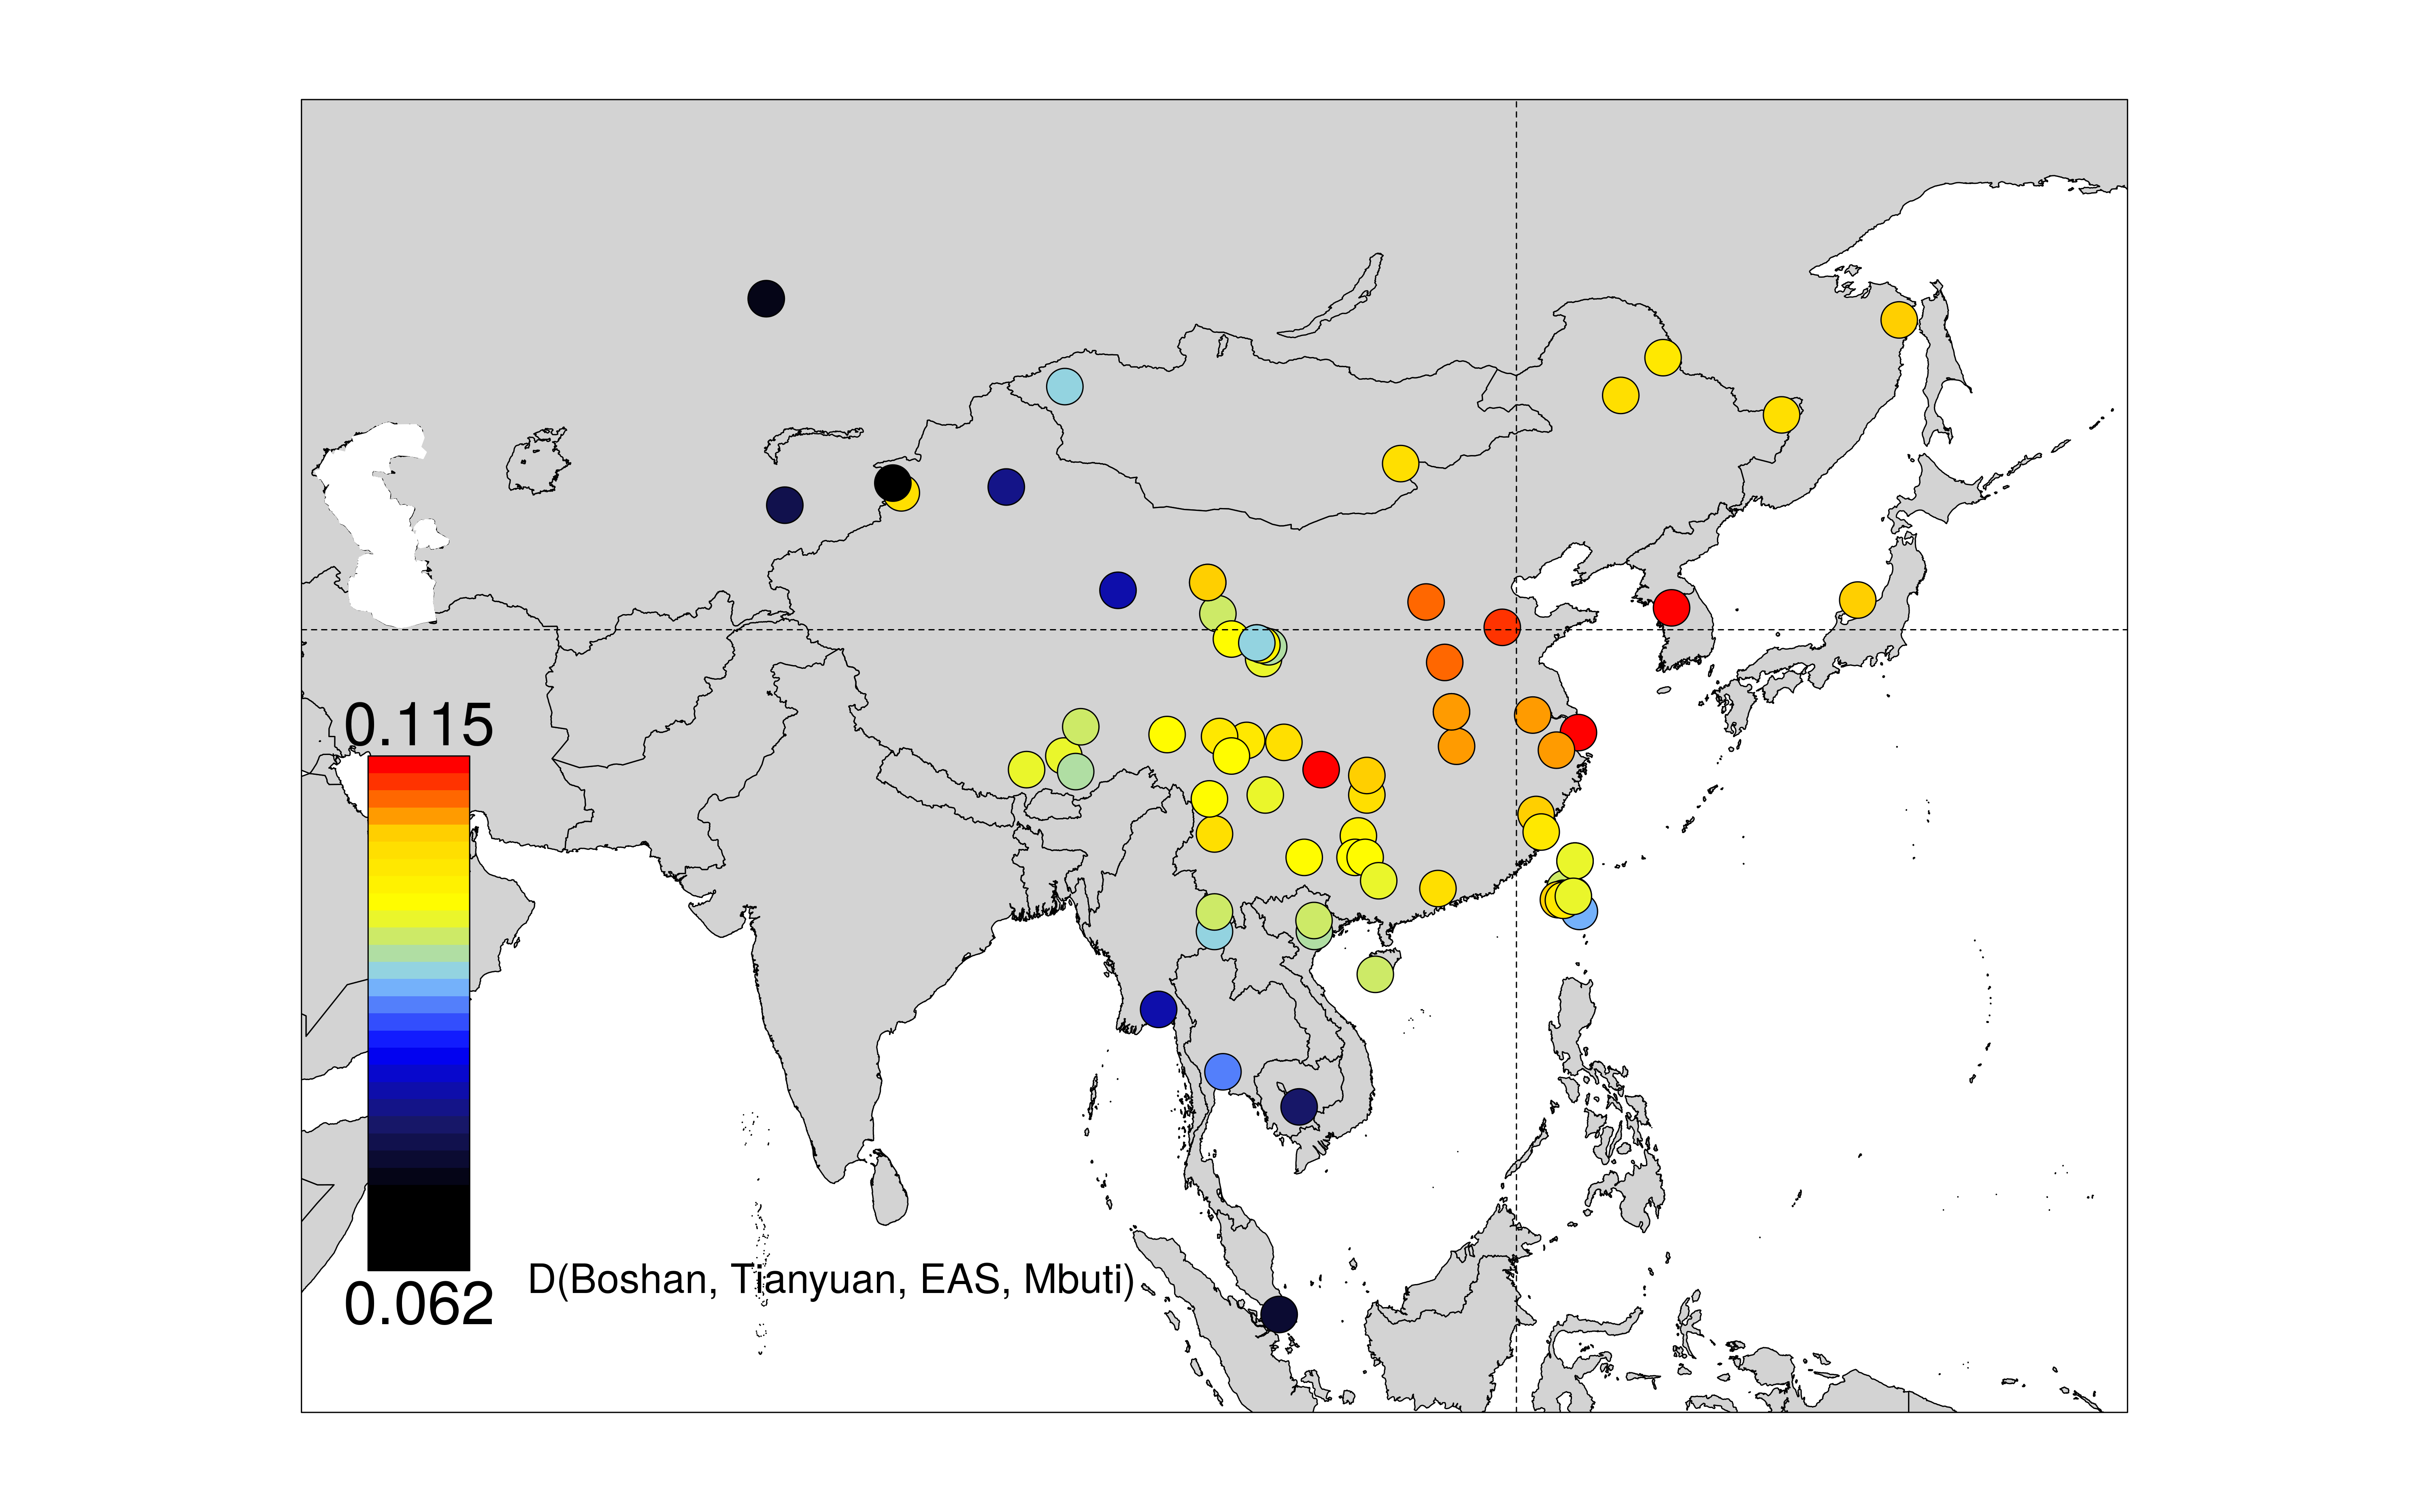

In [19]:
from IPython.display import Image
pD="/mnt/solexa/mel_yang/bronzeage/Dstats/D_ANC_EAS_EAS_P4/"
p3="Boshan"
mytype="pd"
outname="ind_A_v13_TBH5.%s.D_%s_Tianyuan_EAS_Mbuti" % (mytype,p3)
Image(filename=pD+outname+'.png',width=1000,height=1000) 


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import chain
import matplotlib.patches as mpatches
import numpy.ma as ma
pd="/home/mel_yang/projects/allTYstuff/SOMX1_EAs/"
fh="UPA_all2.rn1.071316"
set1="TY_EAs_EAs_Mbuti"
set2="TY_EAs_EAs_Mbuti"

def graballstats(myfile):
    rows,columns,myary=[],[],[]
    Dfile1 = open(myfile)

    for ind1,line in enumerate(Dfile1):
        if ind1==0: columns = x=line.split()[1:]; continue
        x = line.split()
        #x = [float(i) if i.lstrip('-').replace('.','',1).isdigit()==True else i for i in line.split() ]
        rows.append(x[0])
        myary.append(x[1:])
    Dfile1.close()
    myary1 = np.float_(myary)
    return myary1, rows, columns

myary, rows, columns  = graballstats(pd+fh+".D."+set1+".Dmat")
myZary, rows, columns  = graballstats(pd+fh+".D."+set1+".Zmat")
print len(rows)

mymin,mymax=(0,0.15)
mycolors = ['red','blue','brown','black','gray','orange','purple',
           'red','blue','brown','black','gray','orange','purple',
           'red','blue','brown','black','gray','orange','purple',]
fig = plt.figure(figsize=(20,100))

num=1
for ind1,myind in enumerate(rows):
    for ind2,myotherind in enumerate(rows):
        if ind1>=ind2: continue
        ax1=fig.add_subplot(39,6,num)
        num+=1
        #ax2=fig.add_subplot(1,2,2)
        #mypatches=[]

        myZsubary1=myZary[:,ind2]
        myZsubary2=myZary[:,ind1]

        mysubary1=myary[:,ind2]
        mysubary2=myary[:,ind1]
        mysubary1i = ma.masked_where(abs(myZsubary1)>3,mysubary1)
        mysubary1s =  ma.masked_where(abs(myZsubary1)<3,mysubary1)
        mysubary2i = ma.masked_where(abs(myZsubary2)>3,mysubary2)
        mysubary2s =  ma.masked_where(abs(myZsubary2)<3,mysubary2)

        ##Regression
        xy = [(i,list(mysubary2s)[indi]) for indi,i in enumerate(list(mysubary1s)) if np.isnan(i)==False and np.isnan(mysubary2s[indi]) == False]
        x,y = [-1*i[0] for i in xy],[-1*i[1] for i in xy]
        fit = np.polyfit(x,y,1)
        fit_fn = np.poly1d(fit) 
        ax1.plot(x,y, 'o', x+[mymax,mymin], fit_fn(x+[mymax,mymin]), '--',color=mycolors[ind1])

        #ax1.plot(mysubary1s,mysubary2s,'o',color=mycolors[ind1])
        ax1.plot(-mysubary1s,-mysubary2i,'o',color=mycolors[ind1],fillstyle='bottom')
        ax1.plot(-mysubary1i,-mysubary2s,'o',color=mycolors[ind1],fillstyle='left')
        ax1.plot(-mysubary1i,-mysubary2i,'x',color=mycolors[ind1])


        ax1.axhline(y=0,color="black")
        ax1.axvline(x=0,color="black")

        ax1.set_xlabel("D(EAs,TY,%s,Mb)" % (myotherind),fontsize=12)
        ax1.set_ylabel("D(EAs,TY,%s,Mb)" % (myind),fontsize=12) 
        ax1.set_ylim((mymin,mymax))
        ax1.set_xlim((mymin,mymax))
        ax1.plot([-0.3,0.15],[-0.3,0.15])
        #diff = [mylst1[ind1]-mylst2[ind1] for ind1,i in enumerate(mylst1)]
        #ax2.plot(diff,'o',color=mycolors[ind])
        #mypatches.append(mpatches.Patch(color=mycolors[ind1], label='X='+mygroup[0]))
    #ax1.legend(loc='upper left',fontsize=10,handles=mypatches)

plt.tight_layout()

22


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:53: RuntimeWarning: invalid value encountered in absolute
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:53: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:54: RuntimeWarning: invalid value encountered in absolute
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:54: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:55: RuntimeWarning: invalid value encountered in absolute
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:55: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:56: RuntimeWarning: invalid value encountered in absolute
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:56: RuntimeWarning: invalid value encountered in less


IndexError: list index out of range

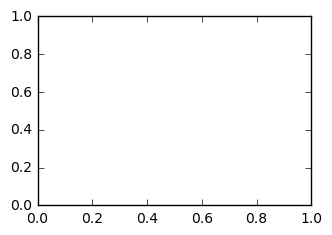

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import chain
import matplotlib.patches as mpatches
import numpy.ma as ma
pd="/home/mel_yang/projects/allTYstuff/SOMX1_EAs/"
fh="UPA_all2.rn1.071316"
set1="TY_EAs_EAs_Mbuti"
set2="TY_EAs_EAs_Mbuti"

def graballstats(myfile):
    rows,columns,myary=[],[],[]
    Dfile1 = open(myfile)

    for ind1,line in enumerate(Dfile1):
        if ind1==0: columns = x=line.split()[1:]; continue
        x = line.split()
        #x = [float(i) if i.lstrip('-').replace('.','',1).isdigit()==True else i for i in line.split() ]
        rows.append(x[0])
        myary.append(x[1:])
    Dfile1.close()
    myary1 = np.float_(myary)
    return myary1, rows, columns

myary, rows, columns  = graballstats(pd+fh+".D."+set1+".Dmat")
myZary, rows, columns  = graballstats(pd+fh+".D."+set1+".Zmat")
print len(rows)

mymin,mymax=(0,0.15)
mycolors = ['red','blue','brown','black','gray','orange','purple',
           'red','blue','brown','black','gray','orange','purple',
           'red','blue','brown','black','gray','orange','purple',]



for ind1,myind in enumerate(rows):
    fig = plt.figure(figsize=(12,20))
    num=1
    for ind2,myotherind in enumerate(rows):
        if ind1==ind2: continue
        ax1=fig.add_subplot(7,3,num)
        num+=1
        #ax2=fig.add_subplot(1,2,2)
        #mypatches=[]

        myZsubary1=myZary[:,ind2]
        myZsubary2=myZary[:,ind1]

        mysubary1=myary[:,ind2]
        mysubary2=myary[:,ind1]
        mysubary1i = ma.masked_where(abs(myZsubary1)>3,mysubary1)
        mysubary1s =  ma.masked_where(abs(myZsubary1)<3,mysubary1)
        mysubary2i = ma.masked_where(abs(myZsubary2)>3,mysubary2)
        mysubary2s =  ma.masked_where(abs(myZsubary2)<3,mysubary2)

        ##Regression
        xy = [(i,list(mysubary2s)[indi]) for indi,i in enumerate(list(mysubary1s)) if np.isnan(i)==False and np.isnan(mysubary2s[indi]) == False]
        x,y = [-1*i[0] for i in xy],[-1*i[1] for i in xy]
        fit = np.polyfit(x,y,1)
        fit_fn = np.poly1d(fit) 
        ax1.plot(x,y, 'o', x+[mymax,mymin], fit_fn(x+[mymax,mymin]), '--',color=mycolors[ind1])

        #ax1.plot(mysubary1s,mysubary2s,'o',color=mycolors[ind1])
        ax1.plot(-mysubary1s,-mysubary2i,'o',color=mycolors[ind1],fillstyle='bottom')
        ax1.plot(-mysubary1i,-mysubary2s,'o',color=mycolors[ind1],fillstyle='left')
        ax1.plot(-mysubary1i,-mysubary2i,'x',color=mycolors[ind1])


        ax1.axhline(y=0,color="black")
        ax1.axvline(x=0,color="black")

        ax1.set_xlabel("D(EAs,TY,%s,Mb)" % (myotherind),fontsize=12)
        ax1.set_ylabel("D(EAs,TY,%s,Mb)" % (myind),fontsize=12) 
        ax1.set_ylim((mymin,mymax))
        ax1.set_xlim((mymin,mymax))
        ax1.plot([-0.3,0.15],[-0.3,0.15])
        #diff = [mylst1[ind1]-mylst2[ind1] for ind1,i in enumerate(mylst1)]
        #ax2.plot(diff,'o',color=mycolors[ind])
        #mypatches.append(mpatches.Patch(color=mycolors[ind1], label='X='+mygroup[0]))
    #ax1.legend(loc='upper left',fontsize=10,handles=mypatches)
    plt.tight_layout()
    #print pd+"D_"+set1+".png"
    fig.savefig(pd+"D_"+myind+"_"+set1+".png", bbox_inches='tight')
    plt.close()
#plt.tight_layout()

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import chain
import matplotlib.patches as mpatches
import numpy.ma as ma
pd="/mnt/solexa/mel_yang/bronzeage/Dstats/D_ANC_EAS_EAS_P4/"
fh="ind_A_v13_TBH5"
set1="Tianyuan_EASALL_EASALL_Mbuti"

def graballstats(myfile):
    rows,myary=[],[]
    Dfile1 = open(myfile,'r')
    num=0
    for ind1,line in enumerate(Dfile1):
        if ind1==0: columns = x=line.split()[1:]; continue
        x = line.split()
        if x[0]=="Pops": continue
        #x = [float(i) if i.lstrip('-').replace('.','',1).isdigit()==True else i for i in line.split() ]
        rows.append(x[0])
        #myary.append(x[1:])
        
        myDs=[i for i in x if i != x[0]]
        myDs=np.array([float(i) if i != 'nan' else np.nan for i in myDs])

        if num==0: myary=myDs; num +=1
        else: myary=np.vstack((myary,myDs))
            
    rows=[i for i in rows if i!='Pops']
    Dfile1.close()

    return myary, rows

myary, rows  = graballstats(pd+fh+".D.ALL."+set1+".Dmat")
myZary, rows  = graballstats(pd+fh+".D.ALL."+set1+".Zmat")
print myary

mymin,mymax=(0,0.15)
mycolors = ['red','blue','brown','black','gray','orange','purple'] *15
           #'red','blue','brown','black','gray','orange','purple',
           #'red','blue','brown','black','gray','orange','purple',]



for ind1,myind in enumerate(rows):
    fig = plt.figure(figsize=(15,60))
    num=1
    if ind1 <= rows.index("Boisman_MN"): continue
    if ind1 == rows.index("Tianyuan"): continue
    for ind2,myotherind in enumerate(rows):
        if ind1==ind2: continue
        if myind == "Tianyuan" or myotherind == "Tianyuan": continue
        print myind, myotherind
        ax1=fig.add_subplot(25,4,num)
        num+=1
        #ax2=fig.add_subplot(1,2,2)
        #mypatches=[]

        myZsubary1=myZary[:,ind2]
        myZsubary2=myZary[:,ind1]

        mysubary1=myary[:,ind2]
        mysubary2=myary[:,ind1]
        mysubary1i = ma.masked_where(abs(myZsubary1)>3,mysubary1)
        mysubary1s =  ma.masked_where(abs(myZsubary1)<3,mysubary1)
        mysubary2i = ma.masked_where(abs(myZsubary2)>3,mysubary2)
        mysubary2s =  ma.masked_where(abs(myZsubary2)<3,mysubary2)
        #print mysubary1, mysubary2
        ##Regression
        xy = [(i,list(mysubary2s)[indi]) for indi,i in enumerate(list(mysubary1s)) if np.isnan(i)==False and np.isnan(mysubary2s[indi]) == False]
        x,y = [-1*i[0] for i in xy],[-1*i[1] for i in xy]
        fit = np.polyfit(x,y,1)
        fit_fn = np.poly1d(fit) 
        ax1.plot(x,y, 'o', x+[mymax,mymin], fit_fn(x+[mymax,mymin]), '--',color=mycolors[ind1])

        #ax1.plot(mysubary1s,mysubary2s,'o',color=mycolors[ind1])
        ax1.plot(-mysubary1s,-mysubary2i,'o',color=mycolors[ind1],fillstyle='bottom')
        ax1.plot(-mysubary1i,-mysubary2s,'o',color=mycolors[ind1],fillstyle='left')
        ax1.plot(-mysubary1i,-mysubary2i,'x',color=mycolors[ind1])


        ax1.axhline(y=0,color="black")
        ax1.axvline(x=0,color="black")

        ax1.set_xlabel("D(EAs,TY,%s,Mb)" % (myotherind),fontsize=12)
        ax1.set_ylabel("D(EAs,TY,%s,Mb)" % (myind),fontsize=12) 
        ax1.set_ylim((mymin,mymax))
        ax1.set_xlim((mymin,mymax))
        ax1.plot([-0.3,0.15],[-0.3,0.15])
        #diff = [mylst1[ind1]-mylst2[ind1] for ind1,i in enumerate(mylst1)]
        #ax2.plot(diff,'o',color=mycolors[ind])
        #mypatches.append(mpatches.Patch(color=mycolors[ind1], label='X='+mygroup[0]))
    #ax1.legend(loc='upper left',fontsize=10,handles=mypatches)
    plt.tight_layout()
    #print pd+"D_"+set1+".png"
    fig.savefig(pd+"D_"+myind+"_"+set1+".png", bbox_inches='tight')
    plt.close()


[[    nan -0.1074 -0.1022 ..., -0.0922 -0.0971 -0.0983]
 [-0.1056     nan -0.1036 ..., -0.0925 -0.0968 -0.0979]
 [-0.0976 -0.1008     nan ..., -0.0913 -0.0965 -0.0982]
 ..., 
 [-0.0931 -0.0953 -0.0972 ...,     nan -0.1108 -0.1133]
 [-0.0945 -0.0957 -0.0986 ..., -0.1069     nan -0.1147]
 [-0.0905 -0.0914 -0.0956 ..., -0.109  -0.1103     nan]]
Boshan Daur
Boshan Hezhen
Boshan Mongola
Boshan Naxi
Boshan Oroqen
Boshan Ulchi
Boshan Xibo
Boshan Dai
Boshan Dong
Boshan Gelao
Boshan Lahu
Boshan Li
Boshan Maonan
Boshan Miao
Boshan Mulam
Boshan She
Boshan Tujia
Boshan Yi
Boshan Zhuang
Boshan Cambodian
Boshan Han_Chongqing
Boshan Han_Fujian
Boshan Han_Guandong
Boshan Han_Henan
Boshan Han_HGDP
Boshan Han_Hubei
Boshan Han_Jiangsu
Boshan Han_NChina
Boshan Han_Shandong
Boshan Han_Shanghai
Boshan Han_Shanxi
Boshan Han_Sichuan
Boshan Han_Zhejiang
Boshan Kinh_Vietnam_KHV
Boshan Korean
Boshan Thai
Boshan Qiang_Horpa
Boshan Tibetan_Chamdo
Boshan Tibetan_Gangcha
Boshan Tibetan_Gannan
Boshan Tibetan_Lhasa
Bo

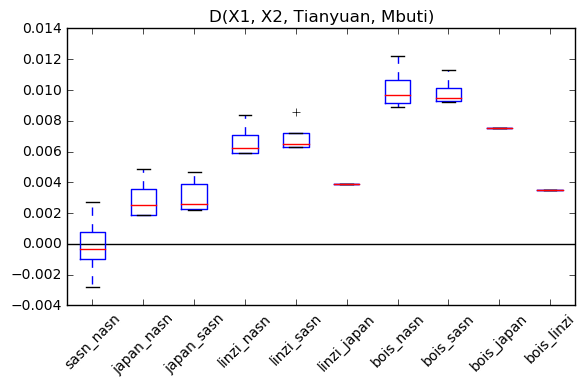

In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import chain
import matplotlib.patches as mpatches
import numpy.ma as ma
pd="/mnt/solexa/mel_yang/bronzeage/Dstats/D_EAS_EAS_ANC_P4/"
fh="ind_A_v13_TBH5"
set1="EASALL_EASALL_Tianyuan_Mbuti"

def graballstats(myfile):
    rows,myary=[],[]
    Dfile1 = open(myfile,'r')
    num=0
    for ind1,line in enumerate(Dfile1):
        if ind1==0: columns = x=line.split()[1:]; continue
        x = line.split()
        if x[0]=="Pops": continue
        #x = [float(i) if i.lstrip('-').replace('.','',1).isdigit()==True else i for i in line.split() ]
        rows.append(x[0])
        #myary.append(x[1:])
        
        myDs=[i for i in x if i != x[0]]
        myDs=np.array([float(i) if i != 'nan' else np.nan for i in myDs])

        if num==0: myary=myDs; num +=1
        else: myary=np.vstack((myary,myDs))
            
    rows=[i for i in rows if i!='Pops']
    Dfile1.close()

    return myary, rows


potentialadmixed=["Bonan","Burmese","Cambodian","Daur","Dongxiang","Kazakh",
                 "Kazakh_China","Kyrgyz","Kyrgyz_China","Malay","Malayan",
                 "Mongol","Salar","Thai","Uygur","Yugur_Eastern","Mongola"]
tibs=['Tibetan_Chamdo','Tibetan_Lhasa','Tibetan_Nagqu','Tibetan_Shannan',
          'Tibetan_Shigatse','Tibetan_Xunhua','Tibetan_Yajiang']
han=['Han_Chongqing','Han_Fujian','Han_Guandong','Han_Henan','Han_HGDP','Han_Hubei',
    'Han_Jiangsu','Han_Shandong','Han_Shanghai','Han_Shanxi',
    'Han_Sichuan','Han_Zhejiang'] # ,'Han_NChina'
nasn=["Daur","Ulchi","Hezhen","Oroqen"]
sasn=["Li","Gelao","Dong","Maonan","Mulam"] #"Ami_Stoneking","Atayal_Stoneking","Zhuang",
japan=["Japanese"]
bois=["Boisman_MN"]
dai=["Linzi"]

myasns=[tibs,han,nasn,sasn] #,japan,dai,bois]
mysets=["tib","han","nasn","sasn"] #,"japan","dai","bois"]

myasns=[nasn,sasn,japan,dai,bois]
mysets=["nasn","sasn","japan","linzi","bois"]

myary, rows  = graballstats(pd+fh+".D.ALL."+set1+".Dmat")

myDs,mysetnames=[],[]
for ind1, asn1 in enumerate(myasns):
    for ind2, asn2 in enumerate(myasns):
        if ind1<=ind2: continue
        p1inds=[rows.index(i) for i in asn1]
        p2inds=[rows.index(i) for i in asn2]
        mylst=[i for i in myary[p1inds,:][:,p2inds].flatten().tolist()]
        mylst=[i for i in mylst if "." in str(i)]
        #print mysets[ind1],mysets[ind2]
        mysetnames.append("%s_%s" % (mysets[ind1],mysets[ind2]))
        myDs.append(mylst)

fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.axhline(y=0,color="black")
ax.boxplot(myDs)
ax.set_xticklabels(mysetnames,rotation=45)
ax.set_title("D(X1, X2, Tianyuan, Mbuti)")
plt.tight_layout()
